In [17]:
""" (Speed visualization: not anymore) time loss/gain visualization on track map
======================================

(Example provided by @JSEHV on Github, modified by Pietro Gavazzi)

TO DO: possible extension
> make 3D circuits
"""

' (Speed visualization: not anymore) time loss/gain visualization on track map\n======================================\n\n(Example provided by @JSEHV on Github, modified by Pietro Gavazzi)\n\nTO DO: possible extension\n> make 3D circuits\n'

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:


import fastf1 as ff1
from  fastf1.plotting import driver_color, team_color,  DRIVER_TRANSLATE



import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors


from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

from print_circuit import  get_driver_lap_telemetry, print_circuit

In [20]:
ff1.Cache.enable_cache("C:/Users/pietr/Documents/trop_long/projet-f1")

##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2024
wknd = 1
ses = 'Q'

##############################################################################
# Next, we load the session and select the desired data.


session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']


In [21]:
# colors
# dark blue : '#07016e'


In [22]:
pil1 = 'SAI'
pil2 = 'LEC'

name_pil_pos = DRIVER_TRANSLATE[pil1]
name_pil_min = DRIVER_TRANSLATE[pil2]

color_pil_pos=driver_color(pil1)
# color_pil_pos = '#07016e'
color_pil_neg=driver_color(pil2)



In [23]:

lap_pil1 = session.laps.pick_driver(pil1).pick_fastest()
lap_pil2 = session.laps.pick_driver(pil2).pick_fastest()



spline_x_pil1, spline_y_pil1, spline_z_pil1, spline_speed_pil1, spline_time_pil1, spline_drs1, spline_gear1, spline_throttle1,  (min_distance_pil1, max_distance_pil1), lap_time1 = get_driver_lap_telemetry(lap_pil1)
spline_x_pil2, spline_y_pil2, spline_z_pil2, spline_speed_pil2, spline_time_pil2, spline_drs2, spline_gear2, spline_throttle2,  (min_distance_pil2, max_distance_pil2), lap_time2 = get_driver_lap_telemetry(lap_pil2)



In [24]:
# limits: from before braking zone to when cars are at 55 m/s or gear 6, 7, 8
limits_bahrein = [540, 1000, 1340, 1750, 2080, 2530, 3000, 3240, 3780, 3940, 4380, 4730, 5200]
limirs_saudi_arabia =  [320,  870, 1170,  1850, 2200, 2700,  2920,3600,  4060, 4800, 5350]


limits = []
if  weekend.Country == "Bahrain":
    limits = limits_bahrein
elif weekend.Country == "Saudi Arabia":
    limits = limirs_saudi_arabia

print(weekend.Country)
print(limits)

Bahrain
[540, 1000, 1340, 1750, 2080, 2530, 3000, 3240, 3780, 3940, 4380, 4730, 5200]


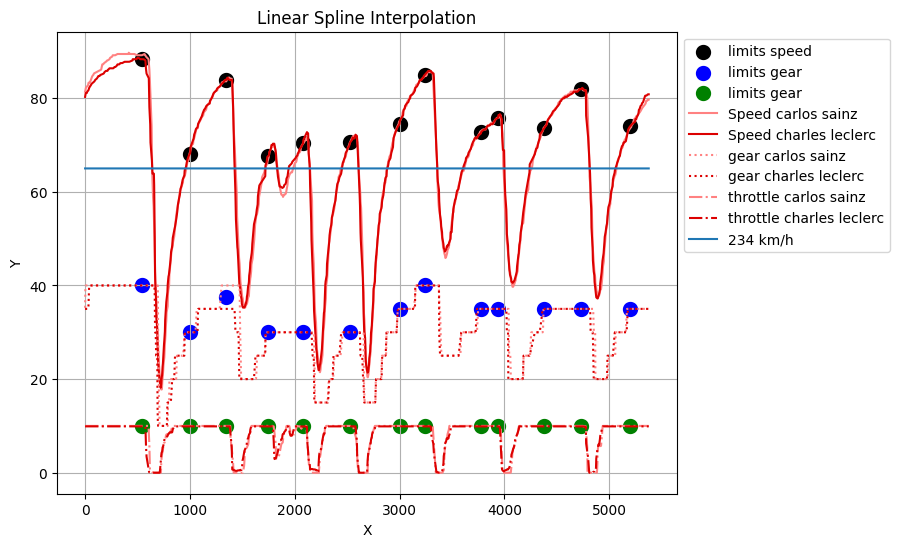

In [25]:



minimum =  max(min_distance_pil1, min_distance_pil2)
maximum =  min(max_distance_pil1, max_distance_pil2)

distance = np.linspace(minimum, maximum, 2000)

speed_pil1 = spline_speed_pil1(distance)
speed_pil2 = spline_speed_pil2(distance)


drs1 = spline_drs1(distance)
drs2 = spline_drs2(distance)

gear1 = spline_gear1(distance)
gear2 = spline_gear2(distance)

throttle1 = spline_throttle1(distance)
throttle2 = spline_throttle2(distance)

# Plot the original data and the interpolated spline

plt.figure(figsize=(8, 6))


dist = np.array(limits)
plt.scatter(dist, (spline_speed_pil2(dist)+spline_speed_pil2(dist))/2,  color='black', linewidths=5, label="limits speed")
plt.scatter(dist, (spline_gear1(dist)+spline_gear2(dist))*2.5,  color='blue', linewidths=5, label="limits gear")
plt.scatter(dist, (spline_throttle1(dist)+spline_throttle2(dist))/20,  color='green', linewidths=5, label="limits gear")

plt.plot(distance, speed_pil1, label=f'Speed {name_pil_pos}', color=color_pil_pos)
plt.plot(distance, speed_pil2, label=f'Speed {name_pil_min}', color=color_pil_neg)

# plt.plot(distance, drs1*14, label=f'DRS {name_pil_pos}', color=color_pil_pos, linestyle='--')
# plt.plot(distance, drs2*14, label=f'DRS {name_pil_min}', color=color_pil_neg, linestyle='--')

plt.plot(distance, gear1*5, label=f"gear {name_pil_pos}", color=color_pil_pos, linestyle=":")
plt.plot(distance, gear2*5, label=f"gear {name_pil_min}", color=color_pil_neg, linestyle=":")

plt.plot(distance, throttle1/10, label=f"throttle {name_pil_pos}", color=color_pil_pos, linestyle="-.")
plt.plot(distance, throttle2/10, label=f"throttle {name_pil_min}", color=color_pil_neg, linestyle="-.")

ms = 65
plt.plot(distance, np.ones(len(distance))*ms, label=f"{round(ms*3.6)} km/h")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Spline Interpolation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


1999
1999


(<Figure size 1200x675 with 2 Axes>, <AxesSubplot:>)

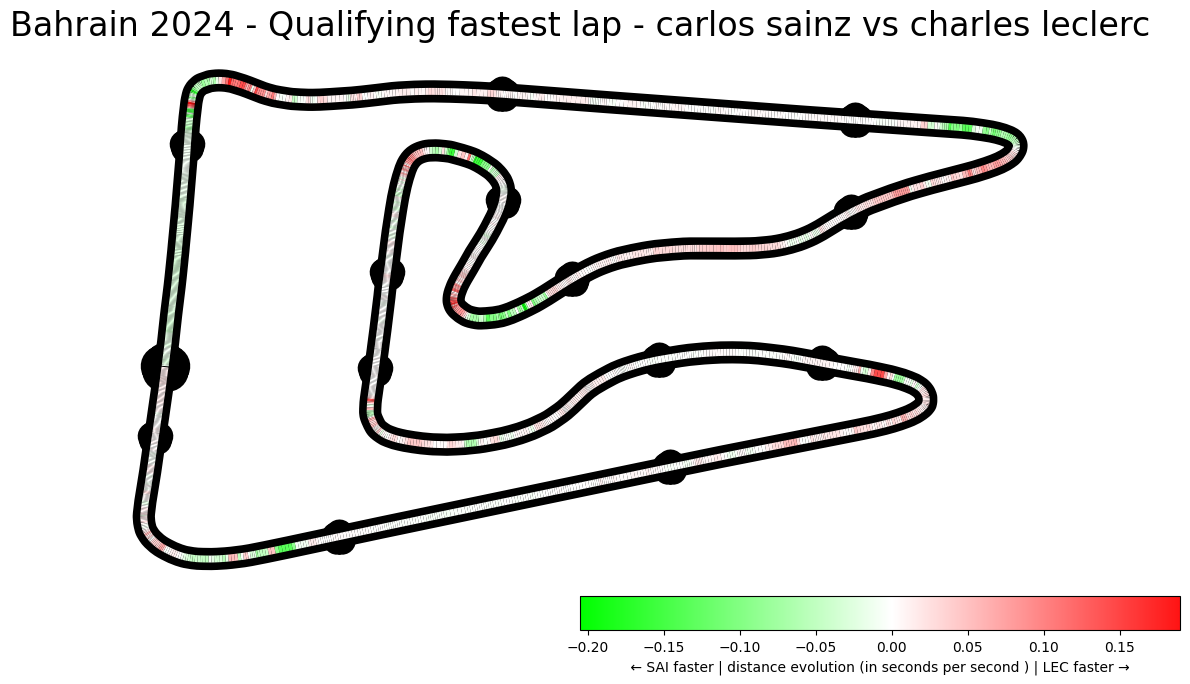

In [26]:
nb_pt = 2000

distance = np.linspace(minimum, maximum, nb_pt)


time_pil1 = spline_time_pil1(distance)
time_pil2 = spline_time_pil2(distance)


distance = np.linspace(minimum, maximum, nb_pt-1)


delta_time_pil1 = np.array([time_pil1[i+1]-time_pil1[i] for i in range((nb_pt-1)) ])
delta_time_pil2 = np.array([time_pil2[i+1]-time_pil2[i] for i in range((nb_pt-1)) ])

pil1_ahead = 2*(delta_time_pil1-delta_time_pil2)/(delta_time_pil1+delta_time_pil2)

x = np.mean([spline_x_pil1(distance), spline_x_pil2(distance)], axis=0)
y = np.mean([spline_y_pil1(distance), spline_y_pil2(distance)], axis=0)

print(len(pil1_ahead))
print(len(x))




limits_coordinates = []
for lim in limits:
    x_lim = (spline_x_pil1(lim)+spline_x_pil2(lim))/2
    y_lim = (spline_y_pil1(lim)+spline_y_pil2(lim))/2
    limits_coordinates.append((x_lim, y_lim))


# plt.plot(distance, pil1_ahead)
# plt.show()
    




scale_name = "distance evolution (in seconds per second )"
print_circuit(x, y, pil1_ahead, session,pil1, pil2, limits_coordinates, 1000, scale_name)


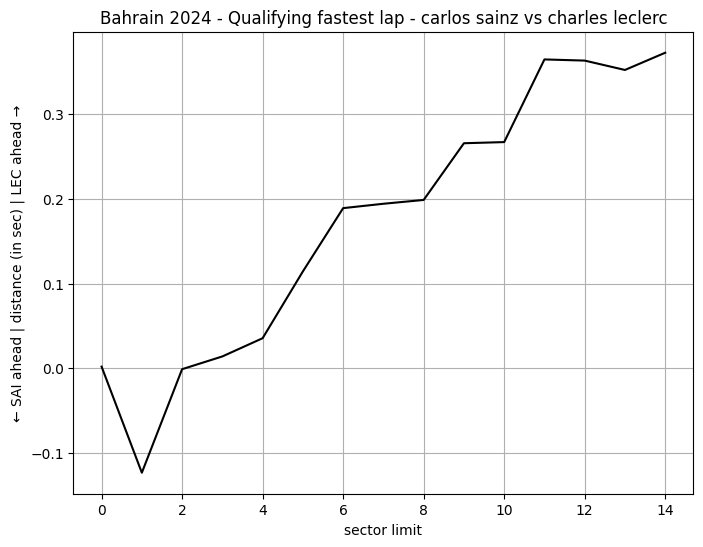

In [27]:

limits_extended = limits.copy()
limits_extended.insert(0, minimum)
limits_extended.append(maximum)

time_pil1 = spline_time_pil1(limits_extended)
time_pil2 = spline_time_pil2(limits_extended)


delta_time_pil1 = np.array([time_pil1[i+1]-time_pil1[i] for i in range(len(limits_extended)-1) ])
delta_time_pil2 = np.array([time_pil2[i+1]-time_pil2[i] for i in range(len(limits_extended)-1) ])

pil1_ahead = delta_time_pil1-delta_time_pil2

nb_pt = 2000
distance = np.linspace(minimum, maximum, nb_pt)
pil_2_ahead = np.zeros(nb_pt)

i = 0
for index, d in enumerate(distance):
    if i < len(limits):
        if d > limits[i]:
            i+=1
    pil_2_ahead[index] = pil1_ahead[i] 


x = np.mean([spline_x_pil1(distance), spline_x_pil2(distance)], axis=0)
y = np.mean([spline_y_pil1(distance), spline_y_pil2(distance)], axis=0)

    
plt.figure(figsize=(8, 6))
plt.plot(time_pil1-time_pil2, color='black')
plt.xlabel('sector limit')
plt.ylabel( f"← {pil1} ahead | distance (in sec) | {pil2} ahead →")
plt.title(f'{weekend.Country} {year} - {session.name} fastest lap - {name_pil_pos} vs {name_pil_min}')
plt.grid(True)
plt.show()




carlos sainz time 0:01:29.507000
charles leclerc time 0:01:29.165000


(<Figure size 1200x675 with 2 Axes>, <AxesSubplot:>)

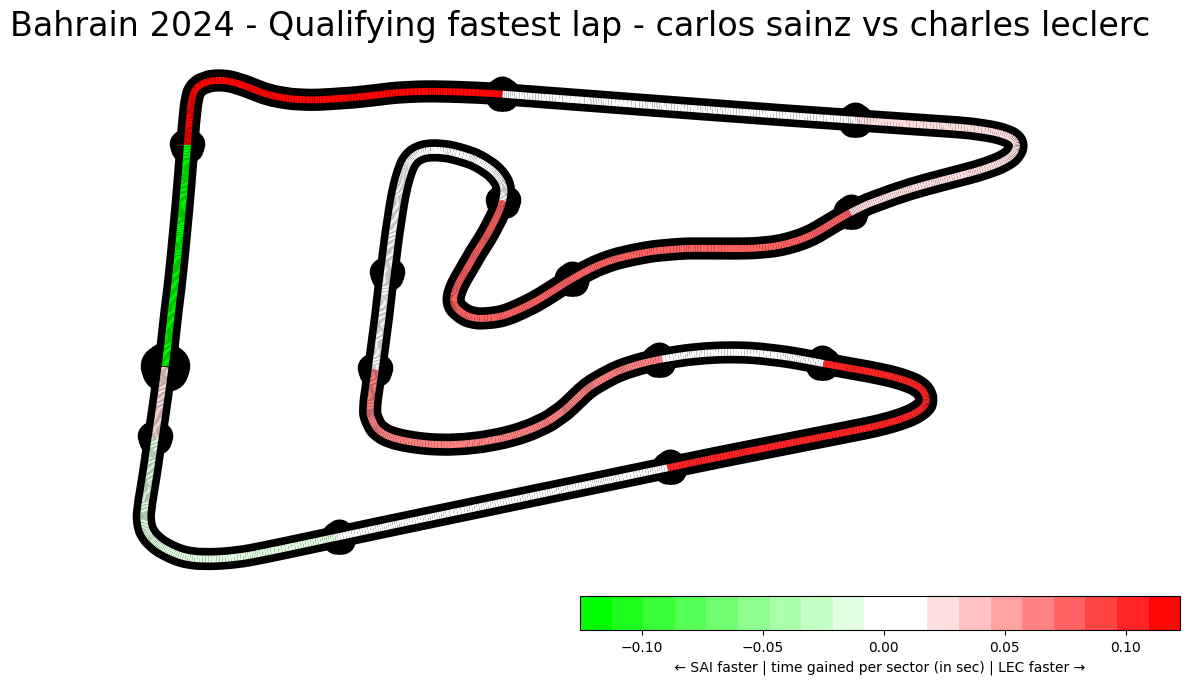

In [30]:
limits_coordinates = []
for lim in limits:
    x_lim = (spline_x_pil1(lim)+spline_x_pil2(lim))/2
    y_lim = (spline_y_pil1(lim)+spline_y_pil2(lim))/2
    limits_coordinates.append((x_lim, y_lim))

from datetime import timedelta

print(f"{name_pil_pos} time {timedelta(seconds=lap_time1)}")
print(f"{name_pil_min} time {timedelta(seconds=lap_time2)}")


scale_name =  "time gained per sector (in sec)"
print_circuit(x, y, pil_2_ahead, session, pil1, pil2, limits_coordinates, 20, scale_name)
